In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
data = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\archive\\spam.csv", encoding='ISO-8859-1')


In [3]:
data = data[['v1', 'v2']]
data.columns = ['Mark', 'SMS']
data.head(2)

,Mark,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [4]:
data['Mark'] = data['Mark'].map({'ham': 0, 'spam': 1})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11644\2501124113.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Mark', data=data, palette='husl')


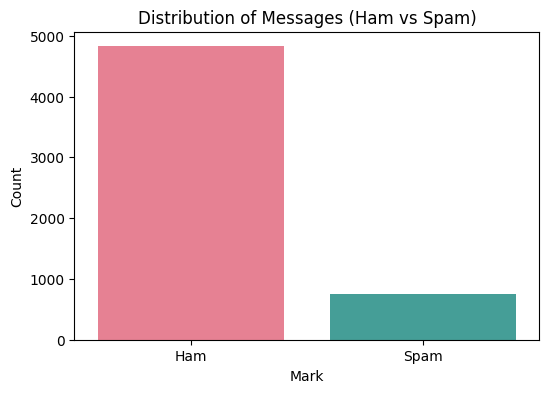

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Mark', data=data, palette='husl')
plt.title('Distribution of Messages (Ham vs Spam)')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.xlabel('Mark')
plt.ylabel('Count')
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data['SMS'], data['Mark'], test_size=0.2, random_state=42)


In [7]:
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [8]:
# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [9]:
y_pred = model.predict(X_test_tfidf)

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



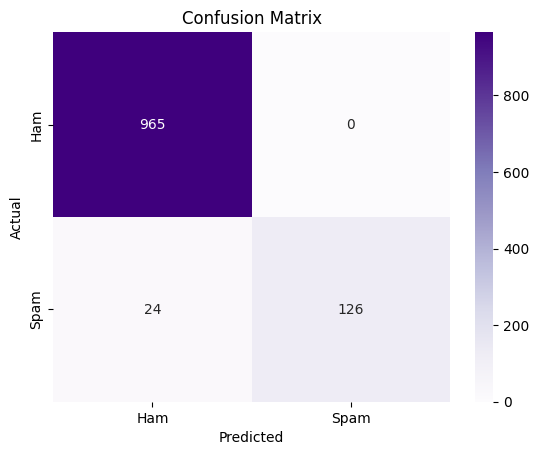

In [11]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [12]:
feature_names = tfidf.get_feature_names_out()
spam_feature_log_probs = model.feature_log_prob_[1]

In [13]:
top_features = pd.DataFrame({'Word': feature_names, 'Importance': spam_feature_log_probs})
top_features = top_features.sort_values(by='Importance', ascending=False).head(20)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11644\3409657344.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Word', data=top_features, palette='rocket')


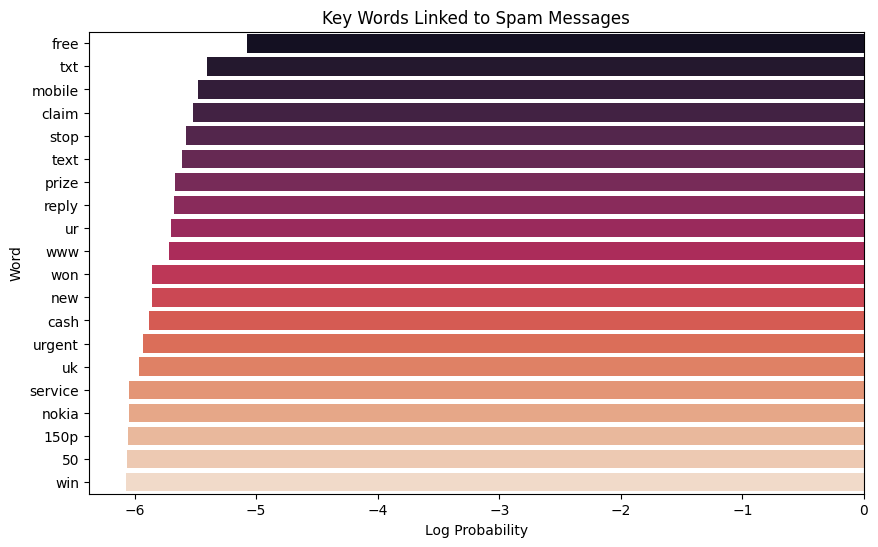

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Word', data=top_features, palette='rocket')
plt.title('Key Words Linked to Spam Messages')
plt.xlabel('Log Probability')
plt.ylabel('Word')
plt.show()